In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

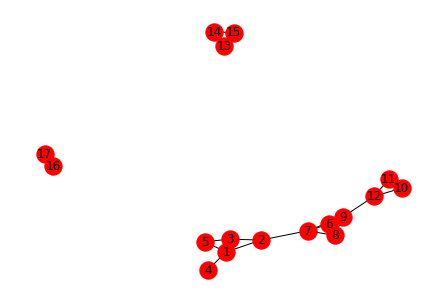

In [56]:
G = nx.Graph()
G.add_edges_from([[1,2],[2,3],[1,3],[1,4],[1,5],[3,5],
                  [6,7],[7,8],[8,9],[6,9],[6,9],[7,9],
                  [10,11],[11,12],[10,12],[9,12],[2,7]
                  ,[13,14],[13,15],[14,15],[16,17]])
nx.draw(G,with_labels=True,node_color='r')

Nv: number of links betwen neighbour of v
Kv: degree of v
clustering coefficient (v) = 2*Nv / Kv *(Kv-1)
K17 = 1
N17 = 0
CC(17) = 2 * N17 /K17*(K17-1) = 2 * 0 /1(1-

In [57]:
#clustering coefficient for each nodes
nx.clustering(G)

{1: 0.3333333333333333,
 2: 0.3333333333333333,
 3: 0.6666666666666666,
 4: 0,
 5: 1.0,
 6: 1.0,
 7: 0.3333333333333333,
 8: 1.0,
 9: 0.3333333333333333,
 10: 1.0,
 11: 1.0,
 12: 0.3333333333333333,
 13: 1.0,
 14: 1.0,
 15: 1.0,
 16: 0,
 17: 0}

In [54]:
#Calculating the betweeness centrality
edge_betweenness = nx.edge_betweenness_centrality(G).items()
sorted(edge_betweenness,key=lambda pair:-pair[1])

[((2, 7), 0.33333333333333337),
 ((9, 12), 0.2571428571428572),
 ((7, 9), 0.2285714285714286),
 ((1, 2), 0.1904761904761905),
 ((2, 3), 0.1142857142857143),
 ((1, 4), 0.10476190476190478),
 ((10, 12), 0.09523809523809525),
 ((11, 12), 0.09523809523809525),
 ((6, 7), 0.06190476190476191),
 ((7, 8), 0.06190476190476191),
 ((1, 5), 0.05714285714285715),
 ((3, 5), 0.04761904761904762),
 ((6, 9), 0.04285714285714286),
 ((8, 9), 0.04285714285714286),
 ((1, 3), 0.01904761904761905),
 ((10, 11), 0.009523809523809525),
 ((13, 14), 0.009523809523809525),
 ((13, 15), 0.009523809523809525),
 ((14, 15), 0.009523809523809525)]

In [55]:
import numpy as np
import community.community_louvain as community_louvain

comms = community_louvain.best_partition(G)
unique_comms = np.unique(list(comms.values()))

for k in range(0,len(unique_comms)):
  nodes = [i for i, j in comms.items() if j ==k] #get all the nodes from a cluster
  avg_coeff=nx.average_clustering(G,nodes)  #calculate avg clustering coeff
  print('Cluster ',k,': ',nodes,': avg_coeff %2f.' %avg_coeff)
  if avg_coeff==1 or avg_coeff ==0:
    print('->Remove cluster %f'%k)
    G.remove_nodes_from(nodes)
  

Cluster  0 :  [1, 2, 3, 4, 5] : avg_coeff 0.466667.
Cluster  1 :  [6, 7, 8, 9] : avg_coeff 0.666667.
Cluster  2 :  [10, 11, 12] : avg_coeff 0.777778.
Cluster  3 :  [13, 14, 15] : avg_coeff 1.000000.
->Remove cluster 3.000000


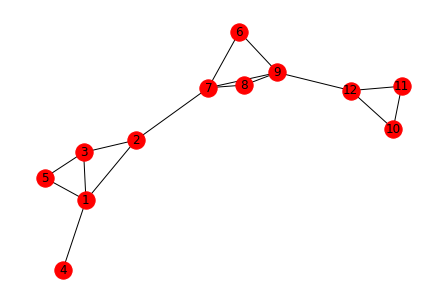

In [49]:
nx.draw(G,with_labels=True,node_color='r')